In [18]:
import csv
import pandas as pd
import numpy as np

In [48]:
data = pd.read_csv('data_preprocessed.csv', sep = ';', encoding='cp1251')

In [31]:
data.columns

Index(['Text', 'Type', 'AttPhoto', 'AttLink', 'AttAudio', 'AttVideo', 'IsAdd',
       'Len', 'Date', 'LikesNormAvg', 'LikesNormFlw', 'Likes', 'AvgLikes',
       'Followers', 'GroupId'],
      dtype='object')

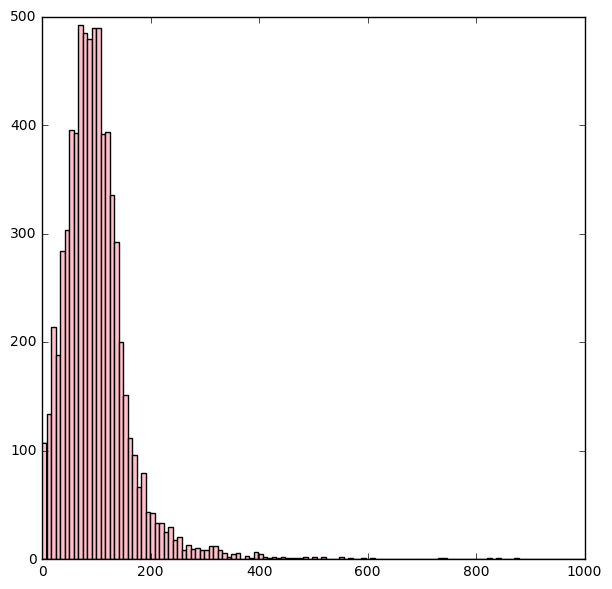

In [21]:
import matplotlib.pyplot as plt
% matplotlib inline
fig = plt.figure(figsize = (7,7))
plt.hist(data['LikesNormAvg'], bins = 300, color = 'pink')
plt.xlim(0,1000)
plt.show()

## Нормализация по среднему числу лайков в группе

In [49]:
y = data['LikesNormAvg'].astype(float)
true_likes = data['Likes'].astype(int)
coef = data['AvgLikes'].astype(float)/100
texts = data['Text']
categ = data['Type']
X = data.drop(['Text','LikesNormAvg', 'LikesNormFlw', 'Likes', 'AvgLikes',
       'Followers', 'GroupId', 'Type'], axis =1)

In [50]:
types = pd.get_dummies(categ)

In [52]:
X = pd.concat((X, types), axis = 1).astype(int)

In [54]:
X.columns

Index(['AttPhoto', 'AttLink', 'AttAudio', 'AttVideo', 'IsAdd', 'Len', 'Date',
       'copy', 'post'],
      dtype='object')

In [37]:
def load_stop_words():
    file = open('stop_words.txt', 'r')
    lines = file.readlines()
    stop_words = []
    for line in lines:
        stop_words.append(line.strip())
    return stop_words

In [38]:
sw = load_stop_words()

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word', stop_words=sw, lowercase=True, max_df=0.8)

In [42]:
texts_tfidf = tfidf.fit_transform(texts)

In [45]:
texts_arr = texts_tfidf.toarray()

In [55]:
from scipy.sparse import csr_matrix, hstack, vstack
X_sparse = csr_matrix(X)
X_all =  hstack((X_sparse, texts_tfidf))

In [56]:
from sklearn.ensemble import RandomForestRegressor
frst = RandomForestRegressor(n_estimators = 100)

In [57]:
state = 27

In [59]:
from sklearn.model_selection import KFold, cross_val_predict
kf = KFold(n_splits = 5, random_state = state)

In [ ]:
pred_raw = cross_val_predict(frst, X_all, y, cv = kf, verbose = 10)

## Нормализация по числу подписчиков в группе

## Без нормализации (число лайков как есть)